In [1]:
"""Explore the behaviour of optimal solution of linear autoencoder for multiple samples."""
import torch
import torch.nn as nn
import torch.optim as optim
from torch import mm, transpose
import matplotlib.pyplot as plt

In [ ]:
class LAE(nn.Module):
    def __init__(self, n, p):
        super(LAE, self).__init__()
        self.n = n
        self.p = p
        self.w1 = nn.Linear(n, p, bias=False)
        self.w2 = nn.Linear(p, n, bias=False)

    def forward(self, y):
        y = self.w1(y)
        y = self.w2(y)
        return y

In [ ]:
n = 25
p = 20
m = 100

inputs = torch.rand(m, n)*2
targets = inputs

In [ ]:
net = LAE(n, p)

learning_rate = 0.0001
epochs = 10000
counter = 1000
params = list(net.parameters())
criterion = nn.MSELoss()
optimizer = optim.Adam(params, lr=learning_rate)

In [ ]:
loss_plt = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    loss_plt.append(loss.item())
    if epoch % counter == 0:
        learning_rate *= 0.95
        optimizer = optim.Adam(params, lr=learning_rate)
        print('epoch: ', epoch, 'loss: ', loss.item())

In [ ]:
plt.plot(loss_plt)

In [ ]:
print(params)

In [ ]:
W1 = params[0].requires_grad_(False)
W2 = params[1].requires_grad_(False)

In [ ]:
W1.size()

In [17]:
# Masked autoencoder (linear)
def binary_mat_generator(prob, m, n):
    zero_mat = torch.zeros(m, n)
    return zero_mat.bernoulli(prob)

class M_LAE(nn.Module):
    def __init__(self, prob, m, n):
        super(M_LAE, self).__init__()
        self.mask = binary_mat_generator(prob, m, n)
        self.m = m
        self.n = n
        w1 = nn.Linear(n, n, bias=False)
        w2 = nn.Linear(n, n, bias=False)
        self.body = nn.Sequential(*[w1, w2])
    
    def forward(self, X):
        Y = torch.mul(self.mask, X)
        Y = self.body(Y)
        return Y

In [18]:
prob = 0.5
m = 100
n = 10

inputs = torch.rand(m, n)
targets = inputs

In [19]:
m_net = M_LAE(prob, m, n)

learning_rate = 0.00003
epochs = 25000
counter = 2000
criterion = nn.MSELoss()
optimizer = optim.Adam(m_net.body.parameters(), lr=learning_rate)

In [20]:
loss_plt = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = m_net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    loss_plt.append(loss.item())
    if epoch % counter == 0:
        print('epoch: ', epoch, 'loss: ', loss.item())

epoch:  0 loss:  0.3698064088821411
epoch:  2000 loss:  0.22719575464725494
epoch:  4000 loss:  0.13753052055835724
epoch:  6000 loss:  0.10687027126550674
epoch:  8000 loss:  0.09546829015016556
epoch:  10000 loss:  0.088083915412426
epoch:  12000 loss:  0.08315503597259521
epoch:  14000 loss:  0.08049385249614716
epoch:  16000 loss:  0.07923746854066849
epoch:  18000 loss:  0.07864534109830856
epoch:  20000 loss:  0.07858358323574066
epoch:  22000 loss:  0.07858343422412872
epoch:  24000 loss:  0.07858343422412872


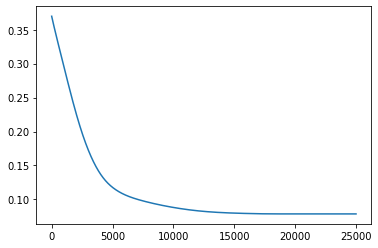

In [21]:
plt.plot(loss_plt)

In [23]:
params = list(m_net.body.parameters())

In [24]:
W1 = params[0].requires_grad_(False)
W2 = params[1].requires_grad_(False)

In [25]:
X = inputs
Xt = transpose(X, 0, 1)
mean_m = torch.ones(m, n) * prob
square_m = torch.ones(n, n) * prob**2
square_m.fill_diagonal_(prob)
mm(transpose(W2, 0, 1), mm(W2, mm(W1, torch.mul(square_m, mm(Xt, X))))-mm(Xt, torch.mul(mean_m, X)))

tensor([[-0.2129,  1.2040,  0.1258, -0.7564, -1.2577, -1.8771, -2.1270, -1.0328,
         -0.3870, -1.8541],
        [ 1.0258,  2.0279, -0.6544,  0.1399, -0.0222, -0.3248, -1.5385,  0.9175,
         -0.5132,  0.3587],
        [ 0.8795, -0.6351,  1.4198, -1.5360, -0.8613, -0.1300,  1.0064, -0.8828,
         -0.8646,  0.1063],
        [-0.3331, -1.4166,  0.7382, -0.6169,  0.2749,  0.3346,  0.9495, -0.5737,
          0.3225,  0.7101],
        [-0.3464, -2.3468,  1.0255, -1.0053,  0.3130,  0.3762,  1.4447, -1.1819,
         -0.2645,  0.5863],
        [ 0.9382,  2.4128, -0.8849, -0.1273,  1.0815, -1.3363, -1.9459,  0.5940,
          0.3118, -0.0545],
        [-0.8566,  0.2653,  0.9956,  0.3883, -0.3253,  0.1957,  0.1593,  0.3246,
         -0.2392, -0.8821],
        [-0.1314,  1.5531, -1.3143, -0.6994,  0.4188, -0.9600, -1.4366, -0.0871,
          0.6977, -0.5827],
        [ 0.2180, -0.1957,  0.6802,  0.3323, -0.2212,  0.4790,  0.2418, -0.2160,
         -0.1675, -0.0684],
        [ 0.3653,  